In [14]:
# we want storm number, name, class and location for each path.

In [15]:
# the first thing is to import pandas and datatime
import pandas as pd
import datetime
from datetime import datetime

In [16]:
# we know that the lat long is north-west, turn them into floating pt values
def lat_lon_to_float(v):
    """
    convert strings from HNC to float locations
    
    """
#the following is the test for conversion of lat long     
    if(v[-1] =="S") or (v[-1] == "W"):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1])* multiplier
# so if there is an S or W it gets a negative in front

In [17]:
#now we have to read the data (text) into the machine
#1. create an empty list to hold the data that we want
data = []

#open the data in "r", read mode...with file handle f
# remember: .strip() removes the white space in the text. 

with open("hurdat2.txt","r") as f:
    for line in f.readlines():
        if line.startswith("AL"):
            storm_id = line.split(",")
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(",")
            dt = datetime.strptime(location_line[0] + location_line[1], "%Y%m%d %H%M")
            storm_status = location_line[3].strip()
            #each of the lines below is a column in the table.
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            #now after parsing we can append them to our data list
            data.append([storm_number, storm_name, storm_status, storm_lat, storm_lon, dt, max_speed])


In [18]:
data[0]

['AL011851',
 'UNNAMED',
 'HU',
 28.0,
 -94.8,
 datetime.datetime(1851, 6, 25, 0, 0),
 80.0]

In [19]:
# now make the dataframe
df = pd.DataFrame(data,columns=["Storm Number","Storm Name", "Storm Status", "Lat", "Lon", "Time", "Max Speed"])

In [20]:
#test the table
df.head()
df.tail()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
51835,AL202019,SEBASTIEN,EX,52.2,-9.3,2019-11-26 12:00:00,45.0
51836,AL202019,SEBASTIEN,EX,52.2,-8.9,2019-11-26 18:00:00,40.0
51837,AL202019,SEBASTIEN,EX,51.8,-8.2,2019-11-27 00:00:00,40.0
51838,AL202019,SEBASTIEN,EX,51.4,-6.0,2019-11-27 06:00:00,40.0
51839,AL202019,SEBASTIEN,EX,51.3,-2.1,2019-11-27 12:00:00,40.0


In [21]:
#how many storms have unique lengths?
len(df["Storm Number"].unique())

1893

In [22]:
# what about how many lines have different storm status?
#here is a table of the different designations, as shown in the .pdf that came with HURDAT
df.groupby("Storm Status").count()

,Storm Number,Storm Name,Lat,Lon,Time,Max Speed
Storm Status,,,,,,
DB,153,153,153,153,153,153
EX,5436,5436,5436,5436,5436,5436
HU,15042,15042,15042,15042,15042,15042
LO,1256,1256,1256,1256,1256,1256
SD,305,305,305,305,305,305
SS,624,624,624,624,624,624
TD,10052,10052,10052,10052,10052,10052
TS,18834,18834,18834,18834,18834,18834
WV,138,138,138,138,138,138


In [23]:
#conda install -c conda-forge cartopy


In [24]:
# now we need to plot this on the map that was previously created.
# this is where matplotlib will come in
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#MAGIC  - render the figure in the notebook.
%matplotlib inline


/home/pchilton/anaconda3/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


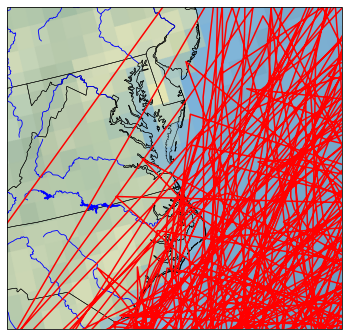

In [30]:
# set coordinate ref. systems
plot_crs =ccrs.LambertConformal(central_longitude = -100., central_latitude = 45)
data_crs =ccrs.PlateCarree()

#figures
fig = plt.figure(figsize = (6,6))

#axis
ax = plt.subplot(1,1,1, projection=plot_crs)
#left side,right side, bottom, top is the order below.
ax.set_extent([-80, -72, 34, 40], data_crs)


#background map
ax.stock_img()
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85, color = "b")
ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, color = 'b')

#df_hu = df[df["Storm Name"] == "CAMILLE"]
df_hu = df[df["Storm Status"] == "HU"]
df_hu = df_hu[df_hu["Time"] > datetime(2000-100,1,1)]

import numpy as np
from matplotlib import cm

#decades = np.arange(1860, 2020, 10)
#colors = cm.get_cmap('tab10', len(decades)).colors

#for year, color in zip(decades, colors):
 #     df_temp = df_hu[(datetime(1860, 1, 1) <= df_hu['Time']) & (df_hu['Time'] < datetime(2020-100, 1, 1))]


#decades = np.arange(1860,2020,10)
#colors = cm.get_cmap("tab10",len(decades)).colors
#for year, color in zip(decades,colors):
 #   df_temp = df_hu[(datetime(2020,1,1) <= df_hu["Time"])&(df_hu["Time"]<datetime(2020-100,1,1))]
    

#for storm_number in df_hu["Storm Number"].unique():
 #   storm_data = df_hu[df_hu["Storm Number"] == storm_number]
  #  ax.plot(storm_data["Lon"], storm_data["Lat"],transform=data_crs)

for storm_status in df_hu["Storm Status"].unique():
    storm_data = df_hu[df_hu["Storm Status"] == "HU"]
    ax.plot(storm_data["Lon"], storm_data["Lat"],color = "r",transform=data_crs)

    

   
    
  

            
    
    

